In [738]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
from tensorflow import keras

In [739]:
def normalize(images):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images

In [740]:
def get_classification_label(file_path):
    return int(file_path.split('/')[-1].split('_')[0])

In [741]:
def fetch_image(file_path):
    img = tf.io.read_file(file_path)
    img = process_image(img)
    img  = tf.reshape(img, [-1])
    return img.numpy()

In [742]:
def process_image(img):
#     print(img)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, [128, 128])

In [743]:
def get_accuracy(model,y_actual):
    preds   = tf.reshape(tf.sign(model), [-1])
    accuracy     = tf.reduce_mean(tf.cast(tf.equal(preds, y_actual), tf.float32))
    return accuracy

In [744]:
def load_images(dir_path):
    file_names = [os.path.join(dir_path, fname) for fname in os.listdir(dir_path)]
    
    np.random.shuffle(file_names)
    
    Y = np.array([ 0 if get_classification_label(files) == 0 else 1 for files in file_names]);
    X = np.array([fetch_image(files) for files in file_names])
    
    standard_scaler = StandardScaler()
    standard_scaler = standard_scaler.fit(X)
    X = standard_scaler.transform(X)
    
    return X , Y

In [745]:
x_Train , y_Train  = load_images("./Food-5K/training")

In [746]:
x_val , y_val = load_images("./Food-5K/validation")

In [261]:
x_val = normalize(x_val)

In [10]:
x_val.shape

(1000, 49152)

In [747]:
x_eval , y_eval= load_images("./Food-5K/evaluation/")

In [489]:
y_eval.shape

(1000,)

In [499]:
from sklearn.metrics import f1_score , accuracy_score

In [128]:
from tensorflow.keras import layers, models, callbacks

In [129]:
import matplotlib.pyplot as plt

In [130]:
import keras_tuner as kt

In [235]:
def plot_metrics(history):
    plt.plot(logs['trial_id'], logs["loss"], label='Training Loss')
    plt.plot(logs['trial_id'], logs['val_loss'], label='Validation Loss')
    plt.plot(logs['trial_id'], logs['accuracy'], label='Training Accuracy')
    plt.plot(history['trial_id'], logs['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Trial ID')
    plt.ylabel('Metric Value')
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    print(f'Training Accuracy: {train_acc[-1]}, Validation Accuracy: {val_acc[-1]}')
    print(f'Training Loss: {train_loss[-1]}, Validation Loss: {val_loss[-1]}')
    
    plt.legend()
    plt.show()

In [205]:
loss=[]

class MetricsReportingCallback(callbacks.Callback): 
    def on_trial_end(self, trial, logs=None):
        for k, v in logs.items():
            print(k)
            if k == 'val_loss':
                 loss.append(v)
#             if k == 'val_accuracy':
#                  history_accuracy.append(v)

        # PLOT YOUR GRAPH HERE
#         plot_my_ia(index, history_accuracy, history_loss)
        
        plt.plot(loss, label='Training Loss')
        plt.legend()
        plt.show()


In [236]:
def plot_graphs(r):
    
    plt.plot(r.history['loss'], label='loss')
    plt.plot(r.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(r.history['accuracy'], label='acc')
    plt.plot(r.history['val_accuracy'], label='val_acc')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    train_acc = r.history['accuracy']
    val_acc = r.history['val_accuracy']
    train_loss = r.history['loss']
    val_loss = r.history['val_loss']

    print(f'Training Accuracy: {train_acc[-1]}, Validation Accuracy: {val_acc[-1]}')
    print(f'Training Loss: {train_loss[-1]}, Validation Loss: {val_loss[-1]}')

    plt.legend()
    plt.show()

In [565]:
model = keras.Sequential()
# model.add(layers.Flatten(input_shape=(128, 128, 3)))
# model.add(keras.layers.Dense(16,input_shape=(49152,),activation = 'relu'))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
                
x_ten =  tf.constant(x_Train)
y_ten =  tf.constant(y_Train)
dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
                     
r1 = model.fit(dataset,validation_data=(x_val,y_val), epochs=50)


Epoch 1/50
94/94 [==============================] - 1s 4ms/step - loss: 0.5801 - accuracy: 0.7400 - val_loss: 0.5695 - val_accuracy: 0.7470
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8013 - val_loss: 0.5820 - val_accuracy: 0.7480
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8283 - val_loss: 0.5870 - val_accuracy: 0.7460
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8470 - val_loss: 0.5908 - val_accuracy: 0.7420
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8610 - val_loss: 0.5947 - val_accuracy: 0.7440
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8720 - val_loss: 0.5988 - val_accuracy: 0.7390
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3129 - accuracy: 0.8823 - val_loss: 0.6029 - val_accuracy: 0.7370
Epoch 8/50
94/94 [==

In [552]:
model.summary()

Model: "sequential_237"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_701 (Dense)           (None, 1)                 49153     
                                                                 
Total params: 49153 (192.00 KB)
Trainable params: 49153 (192.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [760]:
model = keras.Sequential()

model.add(keras.layers.Dense(128,activation = 'sigmoid'))
model.add(keras.layers.Dense(128,activation = 'relu'))
# model.add(keras.layers.Dense(32,activation = 'sigmoid'))

# model.add(keras.layers.Dense(8,activation = 'sigmoid'))

model.add(keras.layers.Dense(1,kernel_regularizer=tf.keras.regularizers.l2(0.1),activation = 'sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
                
x_ten =  tf.constant(x_Train)
y_ten =  tf.constant(y_Train)
dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
                     
r2 = model.fit(dataset,validation_data=(x_val,y_val), epochs=30)

Epoch 1/30
94/94 [==============================] - 1s 9ms/step - loss: 0.7847 - accuracy: 0.7157 - val_loss: 0.7357 - val_accuracy: 0.7670
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 0.7058 - accuracy: 0.7737 - val_loss: 0.7049 - val_accuracy: 0.7680
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.6779 - accuracy: 0.7867 - val_loss: 0.6874 - val_accuracy: 0.7750
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.6582 - accuracy: 0.7940 - val_loss: 0.6739 - val_accuracy: 0.7870
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.6419 - accuracy: 0.7977 - val_loss: 0.6626 - val_accuracy: 0.7880
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.6276 - accuracy: 0.8033 - val_loss: 0.6526 - val_accuracy: 0.7890
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.6148 - accuracy: 0.8077 - val_loss: 0.6435 - val_accuracy: 0.7910
Epoch 8/30
94/94 [==

In [761]:
y_pred = model.predict(x_eval)

32/32 [==============================] - 0s 3ms/step


In [762]:
y_pred = (y_pred >= 0.5).astype(int)

In [763]:
score = f1_score(y_pred,y_eval)

In [764]:
score

0.8031968031968032

In [765]:
accuracy = accuracy_score(y_pred,y_eval)

In [766]:
accuracy

0.803

In [568]:
model = keras.Sequential()
# model.add(layers.Flatten(input_shape=(128, 128, 3)))
model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dense(32,activation = 'relu'))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
                
x_ten =  tf.constant(x_Train)
y_ten =  tf.constant(y_Train)
dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
                     
r3 = model.fit(dataset,validation_data=(x_val,y_val), epochs=50)

Epoch 1/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5215 - accuracy: 0.7370 - val_loss: 0.4649 - val_accuracy: 0.7760
Epoch 2/50
94/94 [==============================] - 1s 7ms/step - loss: 0.3924 - accuracy: 0.8310 - val_loss: 0.4416 - val_accuracy: 0.7870
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3319 - accuracy: 0.8667 - val_loss: 0.4314 - val_accuracy: 0.7910
Epoch 4/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2898 - accuracy: 0.8903 - val_loss: 0.4239 - val_accuracy: 0.7950
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2572 - accuracy: 0.9123 - val_loss: 0.4199 - val_accuracy: 0.8010
Epoch 6/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2307 - accuracy: 0.9300 - val_loss: 0.4179 - val_accuracy: 0.8040
Epoch 7/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2086 - accuracy: 0.9423 - val_loss: 0.4163 - val_accuracy: 0.8090
Epoch 8/50
94/94 [==

In [569]:
model = keras.Sequential()
# model.add(layers.Flatten(input_shape=(128, 128, 3)))
model.add(keras.layers.Dense(128,input_shape=(49152,),activation = 'relu'))
model.add(keras.layers.Dense(32,activation = 'relu'))
model.add(keras.layers.Dense(8,activation = 'relu'))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
                
x_ten =  tf.constant(x_Train)
y_ten =  tf.constant(y_Train)
dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
                     
r4 = model.fit(dataset,validation_data=(x_val,y_val), epochs=50)

Epoch 1/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5502 - accuracy: 0.7173 - val_loss: 0.4850 - val_accuracy: 0.7750
Epoch 2/50
94/94 [==============================] - 1s 6ms/step - loss: 0.4277 - accuracy: 0.8067 - val_loss: 0.4553 - val_accuracy: 0.7950
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3707 - accuracy: 0.8463 - val_loss: 0.4381 - val_accuracy: 0.8090
Epoch 4/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3285 - accuracy: 0.8700 - val_loss: 0.4278 - val_accuracy: 0.8150
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2952 - accuracy: 0.8920 - val_loss: 0.4199 - val_accuracy: 0.8130
Epoch 6/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2670 - accuracy: 0.9063 - val_loss: 0.4166 - val_accuracy: 0.8130
Epoch 7/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2427 - accuracy: 0.9207 - val_loss: 0.4160 - val_accuracy: 0.8150
Epoch 8/50
94/94 [==

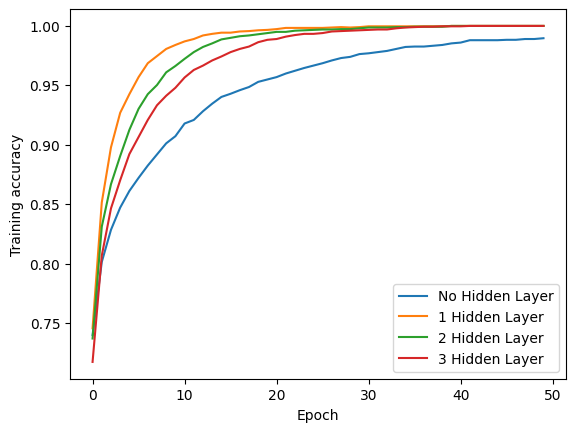

In [570]:
plt.plot(r1.history['accuracy'], label='No Hidden Layer')
plt.plot(r2.history['accuracy'], label='1 Hidden Layer')
plt.plot(r3.history['accuracy'], label='2 Hidden Layer')
plt.plot(r4.history['accuracy'], label='3 Hidden Layer')

plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()

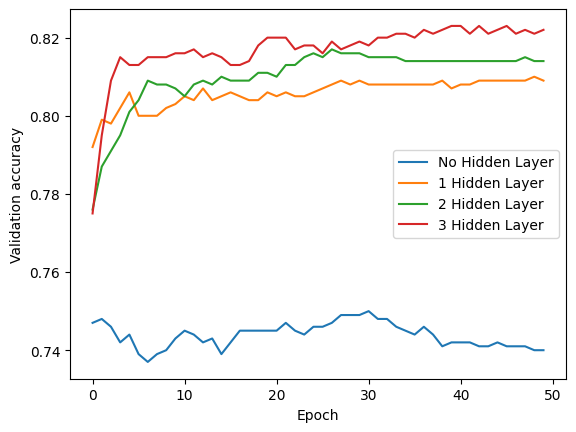

In [571]:
plt.plot(r1.history['val_accuracy'], label='No Hidden Layer')
plt.plot(r2.history['val_accuracy'], label='1 Hidden Layer')
plt.plot(r3.history['val_accuracy'], label='2 Hidden Layer')
plt.plot(r4.history['val_accuracy'], label='3 Hidden Layer')

plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.legend()
plt.show()

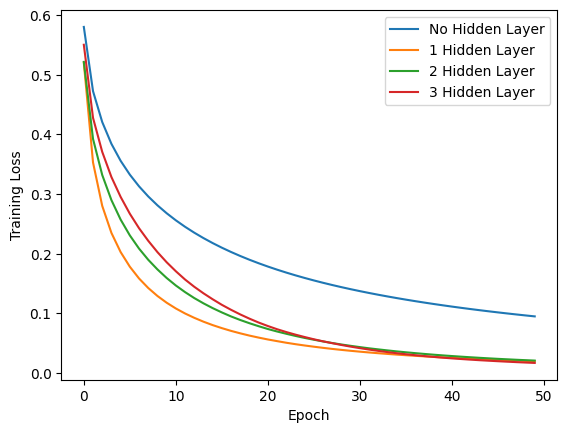

In [572]:
plt.plot(r1.history['loss'], label='No Hidden Layer')
plt.plot(r2.history['loss'], label='1 Hidden Layer')
plt.plot(r3.history['loss'], label='2 Hidden Layer')
plt.plot(r4.history['loss'], label='3 Hidden Layer')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

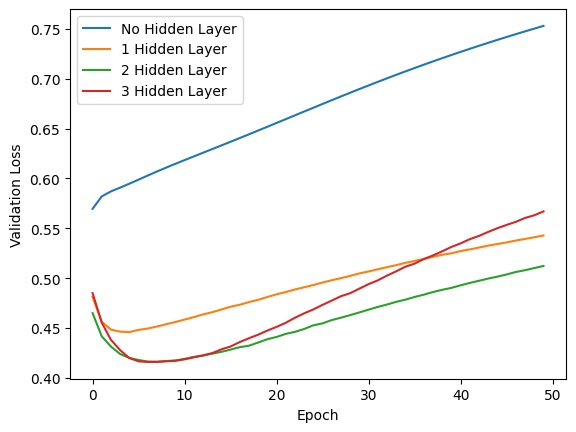

In [573]:
plt.plot(r1.history['val_loss'], label='No Hidden Layer')
plt.plot(r2.history['val_loss'], label='1 Hidden Layer')
plt.plot(r3.history['val_loss'], label='2 Hidden Layer')
plt.plot(r4.history['val_loss'], label='3 Hidden Layer')

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [ ]:
## Method to tune the layers

In [585]:
def tune_layers():
    
    first_layer = [32,64,128]
    second_layer = [0,16,32,64]
    third_layer = [0,8,16,32]
    
    
    for first in first_layer:
        
        for second in second_layer:
            
            for third in third_layer:
                
                if second == 0 and third == 0:
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(first,input_shape=(49152,),activation = 'relu'))
                    model.add(keras.layers.Dense(1,activation = 'sigmoid'))
                    model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
                    x_ten =  tf.constant(x_Train)
                    y_ten =  tf.constant(y_Train)
                    dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
                    r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)
                    print("Layer 1: ", first)
#                     plot_graphs(r)
                    
                elif third == 0:
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(first,input_shape=(49152,),activation = 'relu'))
                    model.add(keras.layers.Dense(second,activation = 'relu'))
                    model.add(keras.layers.Dense(1,activation = 'sigmoid'))
                    model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
                    x_ten =  tf.constant(x_Train)
                    y_ten =  tf.constant(y_Train)
                    dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
                    r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)
                    
                    print("Layer 1: " + str(first) + " Layer 2: " + str(second))
#                     plot_graphs(r)
                
                
                elif second !=0 and third !=0:
                    
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(first,input_shape=(49152,),activation = 'relu'))
                    model.add(keras.layers.Dense(second,activation = 'relu'))
                    model.add(keras.layers.Dense(third,activation = 'relu'))
                    model.add(keras.layers.Dense(1,activation = 'sigmoid'))
                    model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
                    x_ten =  tf.constant(x_Train)
                    y_ten =  tf.constant(y_Train)
                    dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
                    r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)
                    print("Layer 1: " + str(first)  + " Layer 2: " + str(second) + " Layer 3: " + str(third))
#                     plot_graphs(r)
                    
                

In [586]:
tune_layers()

Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 0.5291 - accuracy: 0.7500 - val_loss: 0.4845 - val_accuracy: 0.7770
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8333 - val_loss: 0.4598 - val_accuracy: 0.7990
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8720 - val_loss: 0.4501 - val_accuracy: 0.8020
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.8983 - val_loss: 0.4479 - val_accuracy: 0.8050
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.9180 - val_loss: 0.4483 - val_accuracy: 0.8020
Epoch 6/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9310 - val_loss: 0.4485 - val_accuracy: 0.8020
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9423 - val_loss: 0.4517 - val_accuracy: 0.8000
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 4ms/step - loss: 0.5479 - accuracy: 0.7297 - val_loss: 0.4984 - val_accuracy: 0.7650
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8180 - val_loss: 0.4786 - val_accuracy: 0.7730
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8627 - val_loss: 0.4701 - val_accuracy: 0.7920
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8927 - val_loss: 0.4676 - val_accuracy: 0.7930
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2666 - accuracy: 0.9127 - val_loss: 0.4627 - val_accuracy: 0.7980
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9253 - val_loss: 0.4625 - val_accuracy: 0.7970
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.9350 - val_loss: 0.4650 - val_accuracy: 0.7980
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 4ms/step - loss: 0.5706 - accuracy: 0.7033 - val_loss: 0.5172 - val_accuracy: 0.7540
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7927 - val_loss: 0.4873 - val_accuracy: 0.7650
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8303 - val_loss: 0.4747 - val_accuracy: 0.7840
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8567 - val_loss: 0.4669 - val_accuracy: 0.7900
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8720 - val_loss: 0.4629 - val_accuracy: 0.7980
Epoch 6/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8907 - val_loss: 0.4599 - val_accuracy: 0.7940
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2775 - accuracy: 0.9067 - val_loss: 0.4586 - val_accuracy: 0.7910
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 4ms/step - loss: 0.5823 - accuracy: 0.6893 - val_loss: 0.5254 - val_accuracy: 0.7340
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7773 - val_loss: 0.5020 - val_accuracy: 0.7570
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8050 - val_loss: 0.4861 - val_accuracy: 0.7670
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8300 - val_loss: 0.4769 - val_accuracy: 0.7740
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.8533 - val_loss: 0.4674 - val_accuracy: 0.7830
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8743 - val_loss: 0.4621 - val_accuracy: 0.7870
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8840 - val_loss: 0.4570 - val_accuracy: 0.7970
Epoch 8/30
94/94 [==

Layer 1: 32 Layer 2: 16 Layer 3: 16
Epoch 1/30
94/94 [==============================] - 1s 4ms/step - loss: 0.5529 - accuracy: 0.7350 - val_loss: 0.5219 - val_accuracy: 0.7530
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7897 - val_loss: 0.4933 - val_accuracy: 0.7730
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8183 - val_loss: 0.4765 - val_accuracy: 0.7860
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8347 - val_loss: 0.4661 - val_accuracy: 0.7910
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8503 - val_loss: 0.4592 - val_accuracy: 0.7960
Epoch 6/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8633 - val_loss: 0.4563 - val_accuracy: 0.7980
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8750 - val_loss: 0.4503 - val_a

Epoch 1/30
94/94 [==============================] - 1s 4ms/step - loss: 0.5294 - accuracy: 0.7370 - val_loss: 0.4972 - val_accuracy: 0.7670
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8240 - val_loss: 0.4716 - val_accuracy: 0.7760
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8637 - val_loss: 0.4641 - val_accuracy: 0.7870
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8883 - val_loss: 0.4563 - val_accuracy: 0.8000
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2609 - accuracy: 0.9087 - val_loss: 0.4568 - val_accuracy: 0.8040
Epoch 6/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9223 - val_loss: 0.4567 - val_accuracy: 0.8040
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9350 - val_loss: 0.4579 - val_accuracy: 0.8120
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 4ms/step - loss: 0.5451 - accuracy: 0.7233 - val_loss: 0.5027 - val_accuracy: 0.7650
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8003 - val_loss: 0.4747 - val_accuracy: 0.7880
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8390 - val_loss: 0.4635 - val_accuracy: 0.7900
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3310 - accuracy: 0.8643 - val_loss: 0.4508 - val_accuracy: 0.8060
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.8820 - val_loss: 0.4423 - val_accuracy: 0.8120
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2738 - accuracy: 0.8960 - val_loss: 0.4403 - val_accuracy: 0.8070
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2508 - accuracy: 0.9133 - val_loss: 0.4407 - val_accuracy: 0.8120
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 0.5595 - accuracy: 0.7203 - val_loss: 0.5151 - val_accuracy: 0.7630
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7950 - val_loss: 0.4781 - val_accuracy: 0.7800
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8243 - val_loss: 0.4603 - val_accuracy: 0.7820
Epoch 4/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3655 - accuracy: 0.8493 - val_loss: 0.4484 - val_accuracy: 0.7940
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8693 - val_loss: 0.4449 - val_accuracy: 0.8030
Epoch 6/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8827 - val_loss: 0.4417 - val_accuracy: 0.7960
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8927 - val_loss: 0.4395 - val_accuracy: 0.8000
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 0.5881 - accuracy: 0.6973 - val_loss: 0.5387 - val_accuracy: 0.7560
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7857 - val_loss: 0.4875 - val_accuracy: 0.7810
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8063 - val_loss: 0.4670 - val_accuracy: 0.7880
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.8337 - val_loss: 0.4562 - val_accuracy: 0.8020
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3654 - accuracy: 0.8490 - val_loss: 0.4495 - val_accuracy: 0.8050
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8637 - val_loss: 0.4438 - val_accuracy: 0.8060
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8753 - val_loss: 0.4404 - val_accuracy: 0.8090
Epoch 8/30
94/94 [==

Layer 1: 32 Layer 2: 32 Layer 3: 32


Epoch 1/30
94/94 [==============================] - 1s 7ms/step - loss: 0.5383 - accuracy: 0.7237 - val_loss: 0.4899 - val_accuracy: 0.7860
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8103 - val_loss: 0.4531 - val_accuracy: 0.8080
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3775 - accuracy: 0.8383 - val_loss: 0.4354 - val_accuracy: 0.8170
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3430 - accuracy: 0.8603 - val_loss: 0.4269 - val_accuracy: 0.8280
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8707 - val_loss: 0.4214 - val_accuracy: 0.8300
Epoch 6/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8890 - val_loss: 0.4189 - val_accuracy: 0.8310
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.9020 - val_loss: 0.4180 - val_accuracy: 0.8300
Epoch 8/30
94/94 [==

Layer 1: 32 Layer 2: 64
Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 0.5865 - accuracy: 0.6913 - val_loss: 0.5331 - val_accuracy: 0.7490
Epoch 2/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7650 - val_loss: 0.5024 - val_accuracy: 0.7640
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7983 - val_loss: 0.4860 - val_accuracy: 0.7820
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8183 - val_loss: 0.4755 - val_accuracy: 0.7990
Epoch 5/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8360 - val_loss: 0.4680 - val_accuracy: 0.8010
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.8487 - val_loss: 0.4619 - val_accuracy: 0.8050
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8577 - val_loss: 0.4573 - val_accuracy: 0.8

Epoch 1/30
94/94 [==============================] - 1s 11ms/step - loss: 0.5575 - accuracy: 0.7157 - val_loss: 0.5105 - val_accuracy: 0.7500
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4591 - accuracy: 0.7870 - val_loss: 0.4843 - val_accuracy: 0.7690
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8143 - val_loss: 0.4705 - val_accuracy: 0.7850
Epoch 4/30
94/94 [==============================] - 0s 5ms/step - loss: 0.3904 - accuracy: 0.8283 - val_loss: 0.4613 - val_accuracy: 0.7960
Epoch 5/30
94/94 [==============================] - 0s 5ms/step - loss: 0.3664 - accuracy: 0.8413 - val_loss: 0.4552 - val_accuracy: 0.8010
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3460 - accuracy: 0.8540 - val_loss: 0.4506 - val_accuracy: 0.8050
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3276 - accuracy: 0.8637 - val_loss: 0.4464 - val_accuracy: 0.8060
Epoch 8/30
94/94 [=

Epoch 1/30
94/94 [==============================] - 1s 7ms/step - loss: 0.5570 - accuracy: 0.7123 - val_loss: 0.5003 - val_accuracy: 0.7580
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.7903 - val_loss: 0.4741 - val_accuracy: 0.7800
Epoch 3/30
94/94 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8153 - val_loss: 0.4594 - val_accuracy: 0.7810
Epoch 4/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8360 - val_loss: 0.4497 - val_accuracy: 0.7860
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.8550 - val_loss: 0.4428 - val_accuracy: 0.7910
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3366 - accuracy: 0.8703 - val_loss: 0.4378 - val_accuracy: 0.7920
Epoch 7/30
94/94 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8797 - val_loss: 0.4336 - val_accuracy: 0.7910
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 8ms/step - loss: 0.5163 - accuracy: 0.7447 - val_loss: 0.4893 - val_accuracy: 0.7900
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3730 - accuracy: 0.8353 - val_loss: 0.4608 - val_accuracy: 0.8040
Epoch 3/30
94/94 [==============================] - 0s 5ms/step - loss: 0.3064 - accuracy: 0.8770 - val_loss: 0.4512 - val_accuracy: 0.8030
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2619 - accuracy: 0.9027 - val_loss: 0.4469 - val_accuracy: 0.8010
Epoch 5/30
94/94 [==============================] - 0s 5ms/step - loss: 0.2291 - accuracy: 0.9240 - val_loss: 0.4445 - val_accuracy: 0.8030
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2038 - accuracy: 0.9363 - val_loss: 0.4444 - val_accuracy: 0.8070
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.9487 - val_loss: 0.4439 - val_accuracy: 0.8120
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 13ms/step - loss: 0.5430 - accuracy: 0.7317 - val_loss: 0.4891 - val_accuracy: 0.7740
Epoch 2/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4108 - accuracy: 0.8143 - val_loss: 0.4605 - val_accuracy: 0.7860
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3463 - accuracy: 0.8560 - val_loss: 0.4496 - val_accuracy: 0.7950
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8830 - val_loss: 0.4434 - val_accuracy: 0.7940
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2682 - accuracy: 0.9060 - val_loss: 0.4418 - val_accuracy: 0.7910
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.9210 - val_loss: 0.4408 - val_accuracy: 0.7930
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2180 - accuracy: 0.9370 - val_loss: 0.4413 - val_accuracy: 0.7930
Epoch 8/30
94/94 [=

Epoch 1/30
94/94 [==============================] - 1s 9ms/step - loss: 0.5309 - accuracy: 0.7333 - val_loss: 0.4926 - val_accuracy: 0.7750
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4181 - accuracy: 0.8130 - val_loss: 0.4714 - val_accuracy: 0.7780
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3597 - accuracy: 0.8480 - val_loss: 0.4599 - val_accuracy: 0.7940
Epoch 4/30
94/94 [==============================] - 0s 5ms/step - loss: 0.3170 - accuracy: 0.8727 - val_loss: 0.4548 - val_accuracy: 0.7970
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2824 - accuracy: 0.8947 - val_loss: 0.4526 - val_accuracy: 0.8000
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2556 - accuracy: 0.9097 - val_loss: 0.4508 - val_accuracy: 0.8060
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2317 - accuracy: 0.9220 - val_loss: 0.4462 - val_accuracy: 0.8080
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 11ms/step - loss: 0.6372 - accuracy: 0.6357 - val_loss: 0.5540 - val_accuracy: 0.7170
Epoch 2/30
94/94 [==============================] - 1s 9ms/step - loss: 0.4741 - accuracy: 0.7607 - val_loss: 0.4964 - val_accuracy: 0.7630
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4041 - accuracy: 0.8127 - val_loss: 0.4743 - val_accuracy: 0.7810
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3575 - accuracy: 0.8383 - val_loss: 0.4635 - val_accuracy: 0.7840
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.8643 - val_loss: 0.4594 - val_accuracy: 0.7840
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2914 - accuracy: 0.8810 - val_loss: 0.4588 - val_accuracy: 0.7850
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.8967 - val_loss: 0.4566 - val_accuracy: 0.7860
Epoch 8/30
94/94 [=

Epoch 1/30
94/94 [==============================] - 1s 7ms/step - loss: 0.5523 - accuracy: 0.7247 - val_loss: 0.5033 - val_accuracy: 0.7730
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4479 - accuracy: 0.8017 - val_loss: 0.4706 - val_accuracy: 0.7930
Epoch 3/30
94/94 [==============================] - 5s 50ms/step - loss: 0.4033 - accuracy: 0.8280 - val_loss: 0.4542 - val_accuracy: 0.7950
Epoch 4/30
94/94 [==============================] - 0s 5ms/step - loss: 0.3681 - accuracy: 0.8487 - val_loss: 0.4438 - val_accuracy: 0.8030
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3386 - accuracy: 0.8610 - val_loss: 0.4370 - val_accuracy: 0.8080
Epoch 6/30
94/94 [==============================] - 1s 8ms/step - loss: 0.3124 - accuracy: 0.8787 - val_loss: 0.4316 - val_accuracy: 0.8100
Epoch 7/30
94/94 [==============================] - 1s 11ms/step - loss: 0.2889 - accuracy: 0.8910 - val_loss: 0.4283 - val_accuracy: 0.8120
Epoch 8/30
94/94 [

Epoch 1/30
94/94 [==============================] - 1s 10ms/step - loss: 0.5184 - accuracy: 0.7400 - val_loss: 0.4750 - val_accuracy: 0.7880
Epoch 2/30
94/94 [==============================] - 0s 5ms/step - loss: 0.3996 - accuracy: 0.8200 - val_loss: 0.4476 - val_accuracy: 0.7980
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8590 - val_loss: 0.4353 - val_accuracy: 0.8050
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.8877 - val_loss: 0.4270 - val_accuracy: 0.8130
Epoch 5/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.9077 - val_loss: 0.4224 - val_accuracy: 0.8180
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.9267 - val_loss: 0.4200 - val_accuracy: 0.8170
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2141 - accuracy: 0.9357 - val_loss: 0.4199 - val_accuracy: 0.8200
Epoch 8/30
94/94 [=

Layer 1: 64 Layer 2: 32
Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5744 - accuracy: 0.7040 - val_loss: 0.5061 - val_accuracy: 0.7770
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4445 - accuracy: 0.7973 - val_loss: 0.4696 - val_accuracy: 0.7860
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3880 - accuracy: 0.8287 - val_loss: 0.4538 - val_accuracy: 0.7860
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3481 - accuracy: 0.8533 - val_loss: 0.4418 - val_accuracy: 0.8000
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3165 - accuracy: 0.8703 - val_loss: 0.4380 - val_accuracy: 0.8060
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2895 - accuracy: 0.8840 - val_loss: 0.4335 - val_accuracy: 0.8110
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.8947 - val_loss: 0.4314 - val_accuracy: 0.8

Layer 1: 64 Layer 2: 32 Layer 3: 8
Epoch 1/30
94/94 [==============================] - 1s 9ms/step - loss: 0.5691 - accuracy: 0.7203 - val_loss: 0.5109 - val_accuracy: 0.7580
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4617 - accuracy: 0.7923 - val_loss: 0.4757 - val_accuracy: 0.7880
Epoch 3/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4139 - accuracy: 0.8253 - val_loss: 0.4600 - val_accuracy: 0.7990
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3776 - accuracy: 0.8427 - val_loss: 0.4489 - val_accuracy: 0.8010
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3466 - accuracy: 0.8640 - val_loss: 0.4431 - val_accuracy: 0.8040
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3195 - accuracy: 0.8800 - val_loss: 0.4384 - val_accuracy: 0.8070
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2962 - accuracy: 0.8947 - val_loss: 0.4347 - val_ac

Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 0.5266 - accuracy: 0.7360 - val_loss: 0.4779 - val_accuracy: 0.7740
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8140 - val_loss: 0.4558 - val_accuracy: 0.7940
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.8527 - val_loss: 0.4479 - val_accuracy: 0.8040
Epoch 4/30
94/94 [==============================] - 0s 5ms/step - loss: 0.3164 - accuracy: 0.8760 - val_loss: 0.4405 - val_accuracy: 0.8090
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2840 - accuracy: 0.8997 - val_loss: 0.4372 - val_accuracy: 0.8090
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.9130 - val_loss: 0.4364 - val_accuracy: 0.8070
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2343 - accuracy: 0.9283 - val_loss: 0.4358 - val_accuracy: 0.8140
Epoch 8/30
94/94 [==

Layer 1: 64 Layer 2: 32 Layer 3: 32
Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5098 - accuracy: 0.7470 - val_loss: 0.4862 - val_accuracy: 0.7680
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3960 - accuracy: 0.8247 - val_loss: 0.4606 - val_accuracy: 0.7860
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3399 - accuracy: 0.8577 - val_loss: 0.4456 - val_accuracy: 0.7920
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3000 - accuracy: 0.8847 - val_loss: 0.4379 - val_accuracy: 0.7900
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2683 - accuracy: 0.9050 - val_loss: 0.4316 - val_accuracy: 0.7970
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2425 - accuracy: 0.9183 - val_loss: 0.4285 - val_accuracy: 0.8010
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9310 - val_loss: 0.4262 - val_a

Layer 1: 64 Layer 2: 64
Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5552 - accuracy: 0.7250 - val_loss: 0.4975 - val_accuracy: 0.7660
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4093 - accuracy: 0.8193 - val_loss: 0.4678 - val_accuracy: 0.7870
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3451 - accuracy: 0.8620 - val_loss: 0.4559 - val_accuracy: 0.7900
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.8917 - val_loss: 0.4497 - val_accuracy: 0.7950
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2678 - accuracy: 0.9087 - val_loss: 0.4448 - val_accuracy: 0.7990
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2402 - accuracy: 0.9217 - val_loss: 0.4432 - val_accuracy: 0.7990
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2173 - accuracy: 0.9327 - val_loss: 0.4421 - val_accuracy: 0.8

Epoch 1/30
94/94 [==============================] - 1s 7ms/step - loss: 0.5987 - accuracy: 0.6597 - val_loss: 0.5453 - val_accuracy: 0.7330
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7687 - val_loss: 0.5061 - val_accuracy: 0.7600
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4455 - accuracy: 0.7977 - val_loss: 0.4888 - val_accuracy: 0.7790
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4145 - accuracy: 0.8170 - val_loss: 0.4762 - val_accuracy: 0.7840
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3890 - accuracy: 0.8313 - val_loss: 0.4679 - val_accuracy: 0.7910
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3663 - accuracy: 0.8450 - val_loss: 0.4617 - val_accuracy: 0.8070
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3462 - accuracy: 0.8557 - val_loss: 0.4580 - val_accuracy: 0.8080
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 0.5459 - accuracy: 0.7230 - val_loss: 0.5062 - val_accuracy: 0.7560
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4481 - accuracy: 0.7883 - val_loss: 0.4778 - val_accuracy: 0.7800
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8183 - val_loss: 0.4613 - val_accuracy: 0.7840
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 0.8430 - val_loss: 0.4493 - val_accuracy: 0.7950
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3360 - accuracy: 0.8607 - val_loss: 0.4425 - val_accuracy: 0.8010
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3116 - accuracy: 0.8773 - val_loss: 0.4366 - val_accuracy: 0.8060
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2892 - accuracy: 0.8923 - val_loss: 0.4336 - val_accuracy: 0.8100
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 9ms/step - loss: 0.5221 - accuracy: 0.7430 - val_loss: 0.4756 - val_accuracy: 0.7870
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3687 - accuracy: 0.8367 - val_loss: 0.4514 - val_accuracy: 0.8020
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2968 - accuracy: 0.8833 - val_loss: 0.4433 - val_accuracy: 0.8140
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2501 - accuracy: 0.9130 - val_loss: 0.4400 - val_accuracy: 0.8120
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2161 - accuracy: 0.9310 - val_loss: 0.4390 - val_accuracy: 0.8160
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.1902 - accuracy: 0.9493 - val_loss: 0.4396 - val_accuracy: 0.8170
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.1698 - accuracy: 0.9600 - val_loss: 0.4416 - val_accuracy: 0.8170
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 9ms/step - loss: 0.5244 - accuracy: 0.7393 - val_loss: 0.5004 - val_accuracy: 0.7750
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3615 - accuracy: 0.8430 - val_loss: 0.4759 - val_accuracy: 0.7920
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2842 - accuracy: 0.8903 - val_loss: 0.4631 - val_accuracy: 0.8010
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2346 - accuracy: 0.9193 - val_loss: 0.4591 - val_accuracy: 0.8080
Epoch 5/30
94/94 [==============================] - 1s 7ms/step - loss: 0.1994 - accuracy: 0.9403 - val_loss: 0.4587 - val_accuracy: 0.8150
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.1722 - accuracy: 0.9530 - val_loss: 0.4611 - val_accuracy: 0.8170
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.1506 - accuracy: 0.9647 - val_loss: 0.4629 - val_accuracy: 0.8180
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 10ms/step - loss: 0.6114 - accuracy: 0.6167 - val_loss: 0.5429 - val_accuracy: 0.7100
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4820 - accuracy: 0.7503 - val_loss: 0.5011 - val_accuracy: 0.7600
Epoch 3/30
94/94 [==============================] - 1s 13ms/step - loss: 0.4268 - accuracy: 0.7870 - val_loss: 0.4838 - val_accuracy: 0.7790
Epoch 4/30
94/94 [==============================] - 1s 8ms/step - loss: 0.3873 - accuracy: 0.8220 - val_loss: 0.4717 - val_accuracy: 0.7890
Epoch 5/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3564 - accuracy: 0.8383 - val_loss: 0.4644 - val_accuracy: 0.7960
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3302 - accuracy: 0.8493 - val_loss: 0.4592 - val_accuracy: 0.7990
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3061 - accuracy: 0.8713 - val_loss: 0.4537 - val_accuracy: 0.8060
Epoch 8/30
94/94 [

Epoch 1/30
94/94 [==============================] - 3s 29ms/step - loss: 0.5226 - accuracy: 0.7383 - val_loss: 0.4708 - val_accuracy: 0.7850
Epoch 2/30
94/94 [==============================] - 1s 10ms/step - loss: 0.4042 - accuracy: 0.8217 - val_loss: 0.4533 - val_accuracy: 0.7900
Epoch 3/30
94/94 [==============================] - 1s 14ms/step - loss: 0.3462 - accuracy: 0.8613 - val_loss: 0.4446 - val_accuracy: 0.7970
Epoch 4/30
94/94 [==============================] - 1s 8ms/step - loss: 0.3038 - accuracy: 0.8840 - val_loss: 0.4405 - val_accuracy: 0.7970
Epoch 5/30
94/94 [==============================] - 1s 9ms/step - loss: 0.2698 - accuracy: 0.9037 - val_loss: 0.4389 - val_accuracy: 0.8000
Epoch 6/30
94/94 [==============================] - 1s 14ms/step - loss: 0.2394 - accuracy: 0.9233 - val_loss: 0.4400 - val_accuracy: 0.7990
Epoch 7/30
94/94 [==============================] - 3s 34ms/step - loss: 0.2137 - accuracy: 0.9360 - val_loss: 0.4418 - val_accuracy: 0.8030
Epoch 8/30
94/9

Epoch 1/30
94/94 [==============================] - 2s 16ms/step - loss: 0.5672 - accuracy: 0.7187 - val_loss: 0.5155 - val_accuracy: 0.7640
Epoch 2/30
94/94 [==============================] - 1s 10ms/step - loss: 0.4550 - accuracy: 0.7947 - val_loss: 0.4742 - val_accuracy: 0.7870
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3991 - accuracy: 0.8303 - val_loss: 0.4550 - val_accuracy: 0.7940
Epoch 4/30
94/94 [==============================] - 1s 10ms/step - loss: 0.3593 - accuracy: 0.8577 - val_loss: 0.4426 - val_accuracy: 0.7970
Epoch 5/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3267 - accuracy: 0.8783 - val_loss: 0.4338 - val_accuracy: 0.7990
Epoch 6/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2982 - accuracy: 0.8913 - val_loss: 0.4297 - val_accuracy: 0.8020
Epoch 7/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2735 - accuracy: 0.9063 - val_loss: 0.4255 - val_accuracy: 0.8090
Epoch 8/30
94/94 

Epoch 1/30
94/94 [==============================] - 2s 17ms/step - loss: 0.5325 - accuracy: 0.7460 - val_loss: 0.4710 - val_accuracy: 0.8000
Epoch 2/30
94/94 [==============================] - 1s 10ms/step - loss: 0.3697 - accuracy: 0.8400 - val_loss: 0.4431 - val_accuracy: 0.8000
Epoch 3/30
94/94 [==============================] - 1s 9ms/step - loss: 0.2970 - accuracy: 0.8850 - val_loss: 0.4337 - val_accuracy: 0.8070
Epoch 4/30
94/94 [==============================] - 1s 12ms/step - loss: 0.2490 - accuracy: 0.9153 - val_loss: 0.4295 - val_accuracy: 0.8080
Epoch 5/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2135 - accuracy: 0.9377 - val_loss: 0.4285 - val_accuracy: 0.8110
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.1866 - accuracy: 0.9510 - val_loss: 0.4296 - val_accuracy: 0.8090
Epoch 7/30
94/94 [==============================] - 1s 7ms/step - loss: 0.1647 - accuracy: 0.9587 - val_loss: 0.4318 - val_accuracy: 0.8100
Epoch 8/30
94/94 

Epoch 1/30
94/94 [==============================] - 1s 10ms/step - loss: 0.5245 - accuracy: 0.7417 - val_loss: 0.4667 - val_accuracy: 0.7720
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3988 - accuracy: 0.8300 - val_loss: 0.4427 - val_accuracy: 0.7860
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 0.3332 - accuracy: 0.8700 - val_loss: 0.4318 - val_accuracy: 0.8020
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2869 - accuracy: 0.8980 - val_loss: 0.4273 - val_accuracy: 0.8100
Epoch 5/30
94/94 [==============================] - 1s 9ms/step - loss: 0.2518 - accuracy: 0.9167 - val_loss: 0.4253 - val_accuracy: 0.8090
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2234 - accuracy: 0.9313 - val_loss: 0.4228 - val_accuracy: 0.8190
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2005 - accuracy: 0.9417 - val_loss: 0.4232 - val_accuracy: 0.8170
Epoch 8/30
94/94 [=

Epoch 1/30
94/94 [==============================] - 2s 11ms/step - loss: 0.5263 - accuracy: 0.7373 - val_loss: 0.4952 - val_accuracy: 0.7720
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 0.4189 - accuracy: 0.8160 - val_loss: 0.4680 - val_accuracy: 0.7910
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3620 - accuracy: 0.8537 - val_loss: 0.4523 - val_accuracy: 0.7950
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3188 - accuracy: 0.8863 - val_loss: 0.4447 - val_accuracy: 0.7990
Epoch 5/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2852 - accuracy: 0.9023 - val_loss: 0.4395 - val_accuracy: 0.8020
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2559 - accuracy: 0.9200 - val_loss: 0.4357 - val_accuracy: 0.8070
Epoch 7/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2307 - accuracy: 0.9297 - val_loss: 0.4349 - val_accuracy: 0.8090
Epoch 8/30
94/94 [=

Epoch 1/30
94/94 [==============================] - 2s 23ms/step - loss: 0.5662 - accuracy: 0.7163 - val_loss: 0.5128 - val_accuracy: 0.7450
Epoch 2/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4499 - accuracy: 0.7997 - val_loss: 0.4820 - val_accuracy: 0.7680
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3990 - accuracy: 0.8327 - val_loss: 0.4672 - val_accuracy: 0.7830
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3621 - accuracy: 0.8563 - val_loss: 0.4583 - val_accuracy: 0.7970
Epoch 5/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3319 - accuracy: 0.8743 - val_loss: 0.4520 - val_accuracy: 0.8020
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3054 - accuracy: 0.8910 - val_loss: 0.4469 - val_accuracy: 0.8050
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2820 - accuracy: 0.9060 - val_loss: 0.4441 - val_accuracy: 0.8080
Epoch 8/30
94/94 [=

Epoch 1/30
94/94 [==============================] - 1s 8ms/step - loss: 0.5085 - accuracy: 0.7477 - val_loss: 0.4786 - val_accuracy: 0.7790
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3821 - accuracy: 0.8380 - val_loss: 0.4528 - val_accuracy: 0.7920
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3218 - accuracy: 0.8767 - val_loss: 0.4391 - val_accuracy: 0.7960
Epoch 4/30
94/94 [==============================] - 1s 9ms/step - loss: 0.2787 - accuracy: 0.8990 - val_loss: 0.4324 - val_accuracy: 0.8040
Epoch 5/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2453 - accuracy: 0.9227 - val_loss: 0.4290 - val_accuracy: 0.8030
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2180 - accuracy: 0.9370 - val_loss: 0.4259 - val_accuracy: 0.8070
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.1954 - accuracy: 0.9523 - val_loss: 0.4259 - val_accuracy: 0.8050
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 2s 16ms/step - loss: 0.5322 - accuracy: 0.7327 - val_loss: 0.4780 - val_accuracy: 0.7920
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3828 - accuracy: 0.8360 - val_loss: 0.4488 - val_accuracy: 0.7930
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3111 - accuracy: 0.8750 - val_loss: 0.4416 - val_accuracy: 0.8000
Epoch 4/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2635 - accuracy: 0.8980 - val_loss: 0.4430 - val_accuracy: 0.8060
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2275 - accuracy: 0.9160 - val_loss: 0.4397 - val_accuracy: 0.8140
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.1992 - accuracy: 0.9317 - val_loss: 0.4405 - val_accuracy: 0.8160
Epoch 7/30
94/94 [==============================] - 1s 7ms/step - loss: 0.1762 - accuracy: 0.9423 - val_loss: 0.4475 - val_accuracy: 0.8130
Epoch 8/30
94/94 [=

Epoch 1/30
94/94 [==============================] - 1s 13ms/step - loss: 0.5371 - accuracy: 0.7277 - val_loss: 0.4939 - val_accuracy: 0.7690
Epoch 2/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4280 - accuracy: 0.8103 - val_loss: 0.4679 - val_accuracy: 0.7850
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3719 - accuracy: 0.8437 - val_loss: 0.4519 - val_accuracy: 0.7870
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3300 - accuracy: 0.8707 - val_loss: 0.4410 - val_accuracy: 0.7960
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2964 - accuracy: 0.8990 - val_loss: 0.4336 - val_accuracy: 0.8040
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2677 - accuracy: 0.9153 - val_loss: 0.4300 - val_accuracy: 0.8050
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2432 - accuracy: 0.9273 - val_loss: 0.4268 - val_accuracy: 0.8070
Epoch 8/30
94/94 [=

Epoch 1/30
94/94 [==============================] - 1s 13ms/step - loss: 0.5415 - accuracy: 0.7263 - val_loss: 0.4973 - val_accuracy: 0.7640
Epoch 2/30
94/94 [==============================] - 1s 9ms/step - loss: 0.4239 - accuracy: 0.8113 - val_loss: 0.4681 - val_accuracy: 0.7810
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3682 - accuracy: 0.8527 - val_loss: 0.4519 - val_accuracy: 0.7880
Epoch 4/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3271 - accuracy: 0.8763 - val_loss: 0.4434 - val_accuracy: 0.7990
Epoch 5/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2936 - accuracy: 0.8960 - val_loss: 0.4371 - val_accuracy: 0.8030
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2652 - accuracy: 0.9123 - val_loss: 0.4340 - val_accuracy: 0.8050
Epoch 7/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2409 - accuracy: 0.9253 - val_loss: 0.4318 - val_accuracy: 0.8110
Epoch 8/30
94/94 [=

In [206]:
import pandas as pd

In [831]:
def tune_l2_regularizer_model3():
    lambda_range = [0.001 ,0.01 ,0.1,1]
    
    for l in lambda_range:
        
        model = keras.Sequential()
        model.add(keras.layers.Dense(64,input_shape=(49152,),activation = 'relu'))
        model.add(keras.layers.Dense(32,activation = 'relu'))
        model.add(keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.l2(l),activation = 'relu'))
        model.add(keras.layers.Dense(1,activation = 'sigmoid')) 
    
        model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
        x_ten =  tf.constant(x_Train)
        y_ten =  tf.constant(y_Train)
        dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
        r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)
        
        print("Regularization constant: ",l)
#         plot_graphs(r)

In [832]:
def tune_l2_regularizer_model2():
    lambda_range = [0.001 ,0.01 ,0.1,1]
    
    for l in lambda_range:
        
        model = keras.Sequential()
        model.add(keras.layers.Dense(64,input_shape=(49152,),activation = 'relu'))
        model.add(keras.layers.Dense(32,kernel_regularizer=tf.keras.regularizers.l2(l),activation = 'relu'))
        model.add(keras.layers.Dense(1,activation = 'sigmoid')) 
    
        model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
        x_ten =  tf.constant(x_Train)
        y_ten =  tf.constant(y_Train)
        dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
        r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)
        
        print("Regularization constant: ",l)
#         plot_graphs(r)

In [833]:
def tune_l2_regularizer_model1():
    lambda_range = [0.001 ,0.01 ,0.1,1]
    
    for l in lambda_range:
        
        model = keras.Sequential()
        model.add(keras.layers.Dense(128,input_shape=(49152,),activation = 'relu'))
        model.add(keras.layers.Dense(32,activation = 'relu'))
        model.add(keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.l2(l),activation = 'relu'))
        model.add(keras.layers.Dense(1,activation = 'sigmoid')) 
    
        model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
        x_ten =  tf.constant(x_Train)
        y_ten =  tf.constant(y_Train)
        dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
        r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)
        
        print("Regularization constant: ",l)
#         plot_graphs(r)

In [835]:
tune_l2_regularizer_model1()

Epoch 1/30
94/94 [==============================] - 1s 10ms/step - loss: 0.5802 - accuracy: 0.7140 - val_loss: 0.5244 - val_accuracy: 0.7600
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4767 - accuracy: 0.7923 - val_loss: 0.4939 - val_accuracy: 0.7680
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4279 - accuracy: 0.8253 - val_loss: 0.4783 - val_accuracy: 0.7790
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3925 - accuracy: 0.8470 - val_loss: 0.4670 - val_accuracy: 0.7920
Epoch 5/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3633 - accuracy: 0.8610 - val_loss: 0.4587 - val_accuracy: 0.7960
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3384 - accuracy: 0.8703 - val_loss: 0.4533 - val_accuracy: 0.7960
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3158 - accuracy: 0.8870 - val_loss: 0.4488 - val_accuracy: 0.7980
Epoch 8/30
94/94 [=

Epoch 1/30
94/94 [==============================] - 1s 9ms/step - loss: 0.6436 - accuracy: 0.7257 - val_loss: 0.5942 - val_accuracy: 0.7800
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 0.5189 - accuracy: 0.8153 - val_loss: 0.5672 - val_accuracy: 0.8030
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4575 - accuracy: 0.8553 - val_loss: 0.5532 - val_accuracy: 0.8080
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4162 - accuracy: 0.8827 - val_loss: 0.5472 - val_accuracy: 0.8170
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3846 - accuracy: 0.9057 - val_loss: 0.5414 - val_accuracy: 0.8160
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3585 - accuracy: 0.9153 - val_loss: 0.5407 - val_accuracy: 0.8160
Epoch 7/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3359 - accuracy: 0.9270 - val_loss: 0.5401 - val_accuracy: 0.8200
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 8ms/step - loss: 1.8092 - accuracy: 0.7190 - val_loss: 1.7425 - val_accuracy: 0.7640
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 1.6569 - accuracy: 0.7993 - val_loss: 1.6685 - val_accuracy: 0.7840
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 1.5646 - accuracy: 0.8290 - val_loss: 1.6086 - val_accuracy: 0.7960
Epoch 4/30
94/94 [==============================] - 1s 10ms/step - loss: 1.4865 - accuracy: 0.8537 - val_loss: 1.5572 - val_accuracy: 0.7980
Epoch 5/30
94/94 [==============================] - 1s 7ms/step - loss: 1.4169 - accuracy: 0.8723 - val_loss: 1.5127 - val_accuracy: 0.7990
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 1.3540 - accuracy: 0.8870 - val_loss: 1.4719 - val_accuracy: 0.7970
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 1.2961 - accuracy: 0.9000 - val_loss: 1.4324 - val_accuracy: 0.7990
Epoch 8/30
94/94 [=

Regularization constant:  0.1
Epoch 1/30
94/94 [==============================] - 1s 8ms/step - loss: 11.4104 - accuracy: 0.7360 - val_loss: 9.4379 - val_accuracy: 0.7720
Epoch 2/30
94/94 [==============================] - 1s 8ms/step - loss: 7.8962 - accuracy: 0.8167 - val_loss: 6.6194 - val_accuracy: 0.7900
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 5.5310 - accuracy: 0.8463 - val_loss: 4.6963 - val_accuracy: 0.7960
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 3.9197 - accuracy: 0.8627 - val_loss: 3.3805 - val_accuracy: 0.8000
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 2.8196 - accuracy: 0.8683 - val_loss: 2.4793 - val_accuracy: 0.8000
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 2.0683 - accuracy: 0.8700 - val_loss: 1.8624 - val_accuracy: 0.8010
Epoch 7/30
94/94 [==============================] - 1s 9ms/step - loss: 1.5543 - accuracy: 0.8730 - val_loss: 1.4394 - val_accura

In [697]:
tune_l2_regularizer_model2()

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5543 - accuracy: 0.7303 - val_loss: 0.5015 - val_accuracy: 0.7760
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 0.8247 - val_loss: 0.4755 - val_accuracy: 0.7880
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3362 - accuracy: 0.8647 - val_loss: 0.4654 - val_accuracy: 0.7940
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2929 - accuracy: 0.8957 - val_loss: 0.4582 - val_accuracy: 0.8020
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2591 - accuracy: 0.9163 - val_loss: 0.4574 - val_accuracy: 0.8050
Epoch 6/30
94/94 [==============================] - 0s 5ms/step - loss: 0.2320 - accuracy: 0.9330 - val_loss: 0.4547 - val_accuracy: 0.8030
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.9423 - val_loss: 0.4546 - val_accuracy: 0.8050
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 7ms/step - loss: 0.5735 - accuracy: 0.7287 - val_loss: 0.5097 - val_accuracy: 0.7680
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8207 - val_loss: 0.4872 - val_accuracy: 0.7810
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3556 - accuracy: 0.8627 - val_loss: 0.4792 - val_accuracy: 0.7990
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3120 - accuracy: 0.8913 - val_loss: 0.4730 - val_accuracy: 0.8030
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2791 - accuracy: 0.9107 - val_loss: 0.4714 - val_accuracy: 0.8040
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 0.9287 - val_loss: 0.4705 - val_accuracy: 0.8040
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2309 - accuracy: 0.9377 - val_loss: 0.4696 - val_accuracy: 0.8070
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.7005 - accuracy: 0.7347 - val_loss: 0.6664 - val_accuracy: 0.7720
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.5740 - accuracy: 0.8233 - val_loss: 0.6356 - val_accuracy: 0.7770
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.8587 - val_loss: 0.6174 - val_accuracy: 0.7820
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.8770 - val_loss: 0.6070 - val_accuracy: 0.7940
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.8917 - val_loss: 0.5989 - val_accuracy: 0.7880
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4173 - accuracy: 0.9073 - val_loss: 0.5922 - val_accuracy: 0.7900
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3949 - accuracy: 0.9187 - val_loss: 0.5870 - val_accuracy: 0.7940
Epoch 8/30
94/94 [==

Regularization constant:  0.1
Epoch 1/30
94/94 [==============================] - 1s 7ms/step - loss: 1.6174 - accuracy: 0.6850 - val_loss: 1.3711 - val_accuracy: 0.7510
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 1.1861 - accuracy: 0.7747 - val_loss: 1.0856 - val_accuracy: 0.7800
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.9430 - accuracy: 0.8033 - val_loss: 0.9006 - val_accuracy: 0.7860
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.7855 - accuracy: 0.8213 - val_loss: 0.7776 - val_accuracy: 0.7930
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.8287 - val_loss: 0.6954 - val_accuracy: 0.7960
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.8350 - val_loss: 0.6397 - val_accuracy: 0.7960
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.8373 - val_loss: 0.6016 - val_accurac

Regularization constant:  1
Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 4.8078 - accuracy: 0.6980 - val_loss: 0.9985 - val_accuracy: 0.7380
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.7494 - accuracy: 0.7540 - val_loss: 0.6773 - val_accuracy: 0.7370
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.6644 - accuracy: 0.7497 - val_loss: 0.6640 - val_accuracy: 0.7410
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.7523 - val_loss: 0.6559 - val_accuracy: 0.7400
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.7540 - val_loss: 0.6477 - val_accuracy: 0.7400
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.7530 - val_loss: 0.6396 - val_accuracy: 0.7400
Epoch 7/30
94/94 [==============================] - 0s 5ms/step - loss: 0.6268 - accuracy: 0.7537 - val_loss: 0.6318 - val_accuracy:

In [700]:
tune_l2_regularizer_model3()

Epoch 1/30
94/94 [==============================] - 1s 7ms/step - loss: 0.5504 - accuracy: 0.7170 - val_loss: 0.4979 - val_accuracy: 0.7570
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.8127 - val_loss: 0.4676 - val_accuracy: 0.7830
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8483 - val_loss: 0.4544 - val_accuracy: 0.8010
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3169 - accuracy: 0.8713 - val_loss: 0.4504 - val_accuracy: 0.8010
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2838 - accuracy: 0.8980 - val_loss: 0.4482 - val_accuracy: 0.8150
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2563 - accuracy: 0.9123 - val_loss: 0.4467 - val_accuracy: 0.8090
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2331 - accuracy: 0.9237 - val_loss: 0.4468 - val_accuracy: 0.8040
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5602 - accuracy: 0.7233 - val_loss: 0.5251 - val_accuracy: 0.7720
Epoch 2/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4426 - accuracy: 0.8050 - val_loss: 0.4983 - val_accuracy: 0.7820
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3881 - accuracy: 0.8483 - val_loss: 0.4894 - val_accuracy: 0.7870
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3495 - accuracy: 0.8727 - val_loss: 0.4845 - val_accuracy: 0.7940
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3175 - accuracy: 0.8957 - val_loss: 0.4814 - val_accuracy: 0.8020
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2917 - accuracy: 0.9090 - val_loss: 0.4794 - val_accuracy: 0.8090
Epoch 7/30
94/94 [==============================] - 0s 5ms/step - loss: 0.2694 - accuracy: 0.9230 - val_loss: 0.4808 - val_accuracy: 0.8090
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.7612 - accuracy: 0.6520 - val_loss: 0.6849 - val_accuracy: 0.7390
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.6410 - accuracy: 0.7750 - val_loss: 0.6388 - val_accuracy: 0.7730
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.5881 - accuracy: 0.8083 - val_loss: 0.6152 - val_accuracy: 0.7810
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.5519 - accuracy: 0.8263 - val_loss: 0.5998 - val_accuracy: 0.7900
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.5243 - accuracy: 0.8423 - val_loss: 0.5882 - val_accuracy: 0.8030
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.8560 - val_loss: 0.5787 - val_accuracy: 0.8040
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.8633 - val_loss: 0.5709 - val_accuracy: 0.8050
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 1.7492 - accuracy: 0.7337 - val_loss: 1.4863 - val_accuracy: 0.7760
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 1.2877 - accuracy: 0.8000 - val_loss: 1.1649 - val_accuracy: 0.7890
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 1.0121 - accuracy: 0.8177 - val_loss: 0.9533 - val_accuracy: 0.8020
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.8316 - accuracy: 0.8257 - val_loss: 0.8123 - val_accuracy: 0.8030
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.7114 - accuracy: 0.8337 - val_loss: 0.7168 - val_accuracy: 0.8090
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.8380 - val_loss: 0.6524 - val_accuracy: 0.8120
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.8417 - val_loss: 0.6081 - val_accuracy: 0.8130
Epoch 8/30
94/94 [==

In [709]:
def early_stop_params():
    patience_range = [3,5]
    min_delta_range= [0.001 ,0.0001 ]
    
    for p in patience_range:
        for d in min_delta_range:
            
            early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',  
            patience=p,          
            min_delta=d,    
            mode='min'           
            )
            
            model = keras.Sequential()
            model.add(keras.layers.Dense(128,input_shape=(49152,),activation = 'relu'))
            model.add(keras.layers.Dense(32,activation = 'relu'))
            model.add(keras.layers.Dense(8,activation = 'relu'))
            model.add(keras.layers.Dense(1,activation = 'sigmoid')) 

            model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
            x_ten =  tf.constant(x_Train)
            y_ten =  tf.constant(y_Train)
            dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
            r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30,callbacks=[early_stopping])

            print("patience_range: ",p)
            print("min_delta_range: ",d)
            
#             plot_graphs(r)

In [710]:
def early_stop_params_model2():
    patience_range = [3,5]
    min_delta_range= [0.001 ,0.0001 ]
    
    for p in patience_range:
        for d in min_delta_range:
            
            early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',  
            patience=p,          
            min_delta=d,    
            mode='min'           
            )
            
            model = keras.Sequential()
            model.add(keras.layers.Dense(64,input_shape=(49152,),activation = 'relu'))
            model.add(keras.layers.Dense(32,activation = 'relu'))
#             model.add(keras.layers.Dense(8,activation = 'relu'))
            model.add(keras.layers.Dense(1,activation = 'sigmoid')) 

            model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
            x_ten =  tf.constant(x_Train)
            y_ten =  tf.constant(y_Train)
            dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
            r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30,callbacks=[early_stopping])

            print("patience_range: ",p)
            print("min_delta_range: ",d)
            
#             plot_graphs(r)

In [713]:
def early_stop_params_model3():
    patience_range = [3,5]
    min_delta_range= [0.001 ,0.0001 ]
    
    for p in patience_range:
        for d in min_delta_range:
            
            early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',  
            patience=p,          
            min_delta=d,    
            mode='min'           
            )
            
            model = keras.Sequential()
            model.add(keras.layers.Dense(64,input_shape=(49152,),activation = 'relu'))
            model.add(keras.layers.Dense(32,activation = 'relu'))
            model.add(keras.layers.Dense(16,activation = 'relu'))
            model.add(keras.layers.Dense(1,activation = 'sigmoid')) 

            model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
            x_ten =  tf.constant(x_Train)
            y_ten =  tf.constant(y_Train)
            dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
            r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30,callbacks=[early_stopping])

            print("patience_range: ",p)
            print("min_delta_range: ",d)
            
#             plot_graphs(r)

In [703]:
def tune_dropout_rate_model3():
    dropout_rates = [0.2, 0.3, 0.4, 0.5]
    
    for r in dropout_rates:
        
        model = keras.Sequential([
        keras.layers.Dense(64,input_shape=(49152,),activation = 'relu'),
        keras.layers.Dense(32,activation = 'relu'),
        keras.layers.Dense(16,activation = 'relu'),
        tf.keras.layers.Dropout(r),
        keras.layers.Dense(1,activation = 'sigmoid')
        ])
        
        model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
        x_ten =  tf.constant(x_Train)
        y_ten =  tf.constant(y_Train)
        dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
        r1 = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)
        print("Dropout Rate : " , r)             
#         plot_graphs(r1)

In [704]:
def tune_dropout_rate_model2():
    dropout_rates = [0.2, 0.3, 0.4, 0.5]
    
    for r in dropout_rates:
        
        model = keras.Sequential([
#         keras.layers.Dense(128,input_shape=(49152,),activation = 'relu'),
        keras.layers.Dense(64,activation = 'relu'),
        keras.layers.Dense(32,activation = 'relu'),
        tf.keras.layers.Dropout(r),
        keras.layers.Dense(1,activation = 'sigmoid')
        ])
        
        model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
        x_ten =  tf.constant(x_Train)
        y_ten =  tf.constant(y_Train)
        dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
        r1 = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)
        print("Dropout Rate : " , r)             
#         plot_graphs(r1)

In [612]:
def tune_dropout_rate():
    dropout_rates = [0.2, 0.3, 0.4, 0.5]
    
    for r in dropout_rates:
        
        model = keras.Sequential([
        keras.layers.Dense(128,input_shape=(49152,),activation = 'relu'),
        keras.layers.Dense(32,activation = 'relu'),
        keras.layers.Dense(8,activation = 'relu'),
        tf.keras.layers.Dropout(r),
        keras.layers.Dense(1,activation = 'sigmoid')
        ])
        
        model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
        x_ten =  tf.constant(x_Train)
        y_ten =  tf.constant(y_Train)
        dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
        r1 = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)
        print("Dropout Rate : " , r)             
#         plot_graphs(r1)

In [ ]:
tune_l2_regularizer()

Epoch 1/30
25/94 [======>.......................] - ETA: 0s - loss: 0.6405 - accuracy: 0.6338

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x174da1c60>
Traceback (most recent call last):
  File "/Users/sauravsingh/.pyenv/versions/3.10.6/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


Epoch 1/30
94/94 [==============================] - 2s 12ms/step - loss: 0.5867 - accuracy: 0.6763 - val_loss: 0.5194 - val_accuracy: 0.7450
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 0.4578 - accuracy: 0.7773 - val_loss: 0.4781 - val_accuracy: 0.7840
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.4012 - accuracy: 0.8067 - val_loss: 0.4691 - val_accuracy: 0.7880
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3532 - accuracy: 0.8413 - val_loss: 0.4647 - val_accuracy: 0.7860
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3266 - accuracy: 0.8540 - val_loss: 0.4562 - val_accuracy: 0.7900
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2939 - accuracy: 0.8763 - val_loss: 0.4544 - val_accuracy: 0.7950
Epoch 7/30
94/94 [==============================] - 1s 10ms/step - loss: 0.2712 - accuracy: 0.8897 - val_loss: 0.4557 - val_accuracy: 0.7970
Epoch 8/30
94/94 [

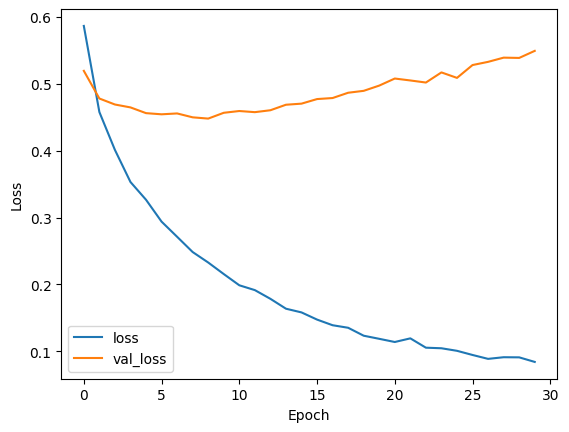

Training Accuracy: 0.972000002861023, Validation Accuracy: 0.8040000200271606
Training Loss: 0.08397568017244339, Validation Loss: 0.5493295788764954


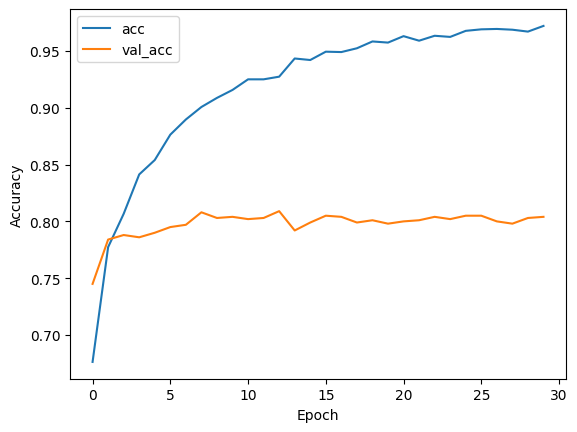

Epoch 1/30
94/94 [==============================] - 1s 8ms/step - loss: 0.5988 - accuracy: 0.6547 - val_loss: 0.5261 - val_accuracy: 0.7570
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5206 - accuracy: 0.7267 - val_loss: 0.4880 - val_accuracy: 0.7770
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4772 - accuracy: 0.7623 - val_loss: 0.4696 - val_accuracy: 0.7820
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4496 - accuracy: 0.7827 - val_loss: 0.4586 - val_accuracy: 0.7970
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4313 - accuracy: 0.7820 - val_loss: 0.4483 - val_accuracy: 0.7920
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4037 - accuracy: 0.8043 - val_loss: 0.4445 - val_accuracy: 0.7900
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3927 - accuracy: 0.8233 - val_loss: 0.4344 - val_accuracy: 0.8020
Epoch 8/30
94/94 [==

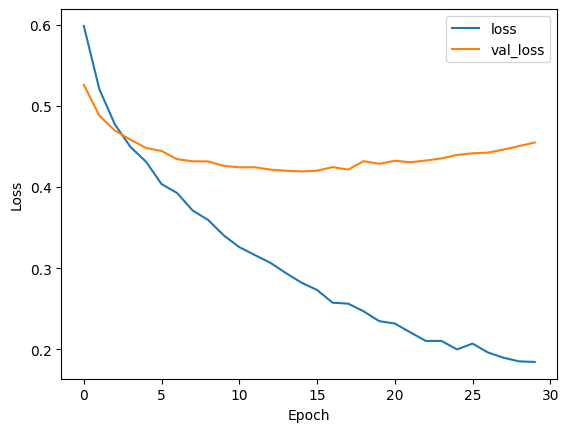

Training Accuracy: 0.9229999780654907, Validation Accuracy: 0.8159999847412109
Training Loss: 0.18430021405220032, Validation Loss: 0.45498111844062805


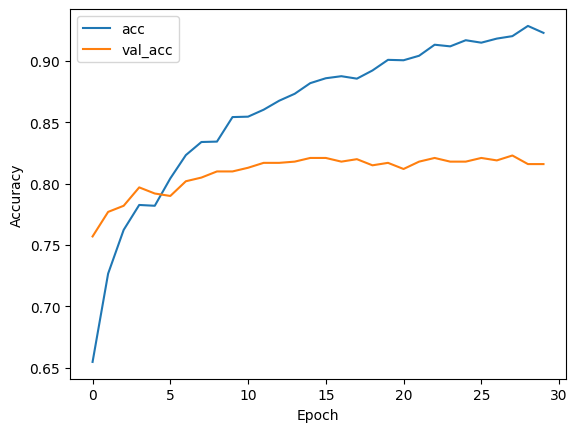

Epoch 1/30
94/94 [==============================] - 1s 8ms/step - loss: 0.6056 - accuracy: 0.6577 - val_loss: 0.5019 - val_accuracy: 0.7660
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4849 - accuracy: 0.7633 - val_loss: 0.4683 - val_accuracy: 0.7940
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4367 - accuracy: 0.7933 - val_loss: 0.4481 - val_accuracy: 0.8020
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4020 - accuracy: 0.8143 - val_loss: 0.4377 - val_accuracy: 0.8060
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3851 - accuracy: 0.8207 - val_loss: 0.4278 - val_accuracy: 0.8110
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3651 - accuracy: 0.8303 - val_loss: 0.4237 - val_accuracy: 0.8100
Epoch 7/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3442 - accuracy: 0.8423 - val_loss: 0.4239 - val_accuracy: 0.8050
Epoch 8/30
94/94 [==

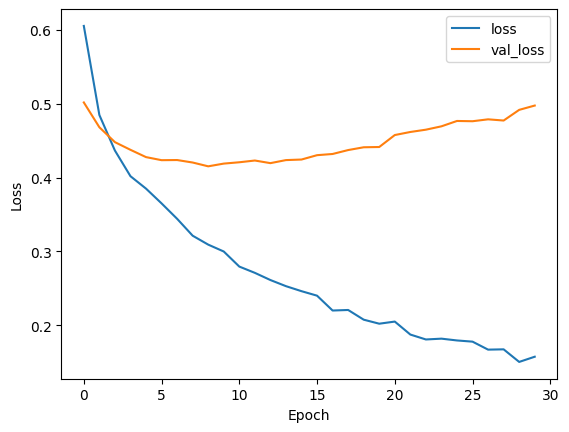

Training Accuracy: 0.9333333373069763, Validation Accuracy: 0.8159999847412109
Training Loss: 0.15735624730587006, Validation Loss: 0.497706800699234


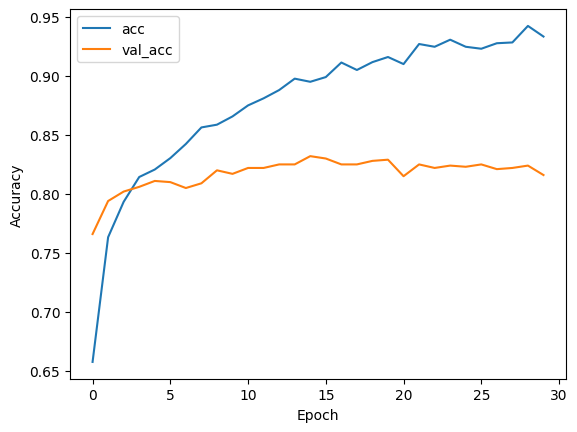

Epoch 1/30
94/94 [==============================] - 3s 24ms/step - loss: 0.6626 - accuracy: 0.6263 - val_loss: 0.4999 - val_accuracy: 0.7840
Epoch 2/30
94/94 [==============================] - 1s 9ms/step - loss: 0.5496 - accuracy: 0.7017 - val_loss: 0.4754 - val_accuracy: 0.7840
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 0.5102 - accuracy: 0.7497 - val_loss: 0.4654 - val_accuracy: 0.7940
Epoch 4/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4857 - accuracy: 0.7677 - val_loss: 0.4512 - val_accuracy: 0.7970
Epoch 5/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4550 - accuracy: 0.7890 - val_loss: 0.4495 - val_accuracy: 0.7990
Epoch 6/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4315 - accuracy: 0.7983 - val_loss: 0.4422 - val_accuracy: 0.8050
Epoch 7/30
94/94 [==============================] - 1s 7ms/step - loss: 0.4142 - accuracy: 0.8103 - val_loss: 0.4426 - val_accuracy: 0.8080
Epoch 8/30
94/94 [=

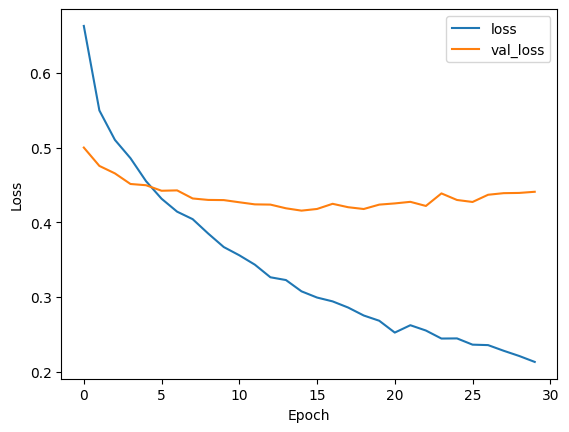

Training Accuracy: 0.9269999861717224, Validation Accuracy: 0.8320000171661377
Training Loss: 0.21324804425239563, Validation Loss: 0.4407925605773926


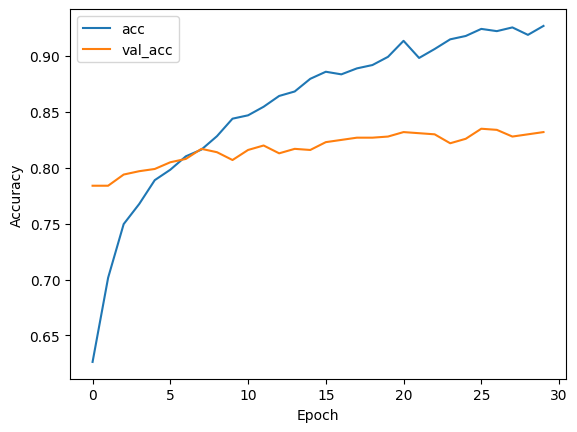

In [685]:
tune_dropout_rate()

In [705]:
tune_dropout_rate_model2()

Epoch 1/30
94/94 [==============================] - 2s 13ms/step - loss: 0.5397 - accuracy: 0.7173 - val_loss: 0.4890 - val_accuracy: 0.7720
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8137 - val_loss: 0.4655 - val_accuracy: 0.7870
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3604 - accuracy: 0.8497 - val_loss: 0.4494 - val_accuracy: 0.7970
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3251 - accuracy: 0.8687 - val_loss: 0.4412 - val_accuracy: 0.8030
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.8840 - val_loss: 0.4382 - val_accuracy: 0.8070
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2756 - accuracy: 0.8987 - val_loss: 0.4331 - val_accuracy: 0.8060
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.9160 - val_loss: 0.4381 - val_accuracy: 0.8070
Epoch 8/30
94/94 [=

Dropout Rate :  0.2
Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 0.5487 - accuracy: 0.7280 - val_loss: 0.4885 - val_accuracy: 0.7840
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.7963 - val_loss: 0.4583 - val_accuracy: 0.7940
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.8380 - val_loss: 0.4543 - val_accuracy: 0.8020
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.8663 - val_loss: 0.4418 - val_accuracy: 0.8070
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2921 - accuracy: 0.8870 - val_loss: 0.4356 - val_accuracy: 0.8090
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2763 - accuracy: 0.8963 - val_loss: 0.4377 - val_accuracy: 0.8070
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2462 - accuracy: 0.9093 - val_loss: 0.4400 - val_accuracy: 0.8180


Dropout Rate :  0.3
Epoch 1/30
94/94 [==============================] - 2s 14ms/step - loss: 0.5980 - accuracy: 0.6900 - val_loss: 0.4767 - val_accuracy: 0.7830
Epoch 2/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4775 - accuracy: 0.7630 - val_loss: 0.4513 - val_accuracy: 0.8000
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4054 - accuracy: 0.8160 - val_loss: 0.4548 - val_accuracy: 0.8000
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3608 - accuracy: 0.8450 - val_loss: 0.4487 - val_accuracy: 0.8130
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.8553 - val_loss: 0.4403 - val_accuracy: 0.8050
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3097 - accuracy: 0.8723 - val_loss: 0.4382 - val_accuracy: 0.8130
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2897 - accuracy: 0.8847 - val_loss: 0.4426 - val_accuracy: 0.8110

Epoch 1/30
94/94 [==============================] - 1s 9ms/step - loss: 0.6185 - accuracy: 0.6597 - val_loss: 0.4947 - val_accuracy: 0.7790
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4939 - accuracy: 0.7597 - val_loss: 0.4618 - val_accuracy: 0.7880
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.8027 - val_loss: 0.4622 - val_accuracy: 0.7920
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4191 - accuracy: 0.8103 - val_loss: 0.4398 - val_accuracy: 0.8140
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3649 - accuracy: 0.8303 - val_loss: 0.4385 - val_accuracy: 0.8210
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3622 - accuracy: 0.8467 - val_loss: 0.4371 - val_accuracy: 0.8150
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3251 - accuracy: 0.8603 - val_loss: 0.4351 - val_accuracy: 0.8140
Epoch 8/30
94/94 [==

In [706]:
tune_dropout_rate_model3()

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5961 - accuracy: 0.6600 - val_loss: 0.5322 - val_accuracy: 0.7590
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4890 - accuracy: 0.7587 - val_loss: 0.5011 - val_accuracy: 0.7760
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4376 - accuracy: 0.8080 - val_loss: 0.4811 - val_accuracy: 0.7870
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4021 - accuracy: 0.8230 - val_loss: 0.4679 - val_accuracy: 0.7910
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3701 - accuracy: 0.8487 - val_loss: 0.4588 - val_accuracy: 0.8000
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8620 - val_loss: 0.4525 - val_accuracy: 0.8070
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3315 - accuracy: 0.8690 - val_loss: 0.4481 - val_accuracy: 0.8070
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5791 - accuracy: 0.7033 - val_loss: 0.4811 - val_accuracy: 0.7830
Epoch 2/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4547 - accuracy: 0.7853 - val_loss: 0.4511 - val_accuracy: 0.7920
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4026 - accuracy: 0.8167 - val_loss: 0.4420 - val_accuracy: 0.8010
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3585 - accuracy: 0.8483 - val_loss: 0.4424 - val_accuracy: 0.7960
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3279 - accuracy: 0.8673 - val_loss: 0.4368 - val_accuracy: 0.8080
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2991 - accuracy: 0.8793 - val_loss: 0.4429 - val_accuracy: 0.8060
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2763 - accuracy: 0.8910 - val_loss: 0.4379 - val_accuracy: 0.8140
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.6096 - accuracy: 0.6720 - val_loss: 0.4903 - val_accuracy: 0.7760
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.7663 - val_loss: 0.4582 - val_accuracy: 0.7960
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.4229 - accuracy: 0.8037 - val_loss: 0.4494 - val_accuracy: 0.8000
Epoch 4/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3820 - accuracy: 0.8260 - val_loss: 0.4445 - val_accuracy: 0.8060
Epoch 5/30
94/94 [==============================] - 0s 5ms/step - loss: 0.3504 - accuracy: 0.8483 - val_loss: 0.4473 - val_accuracy: 0.8020
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3239 - accuracy: 0.8670 - val_loss: 0.4361 - val_accuracy: 0.8150
Epoch 7/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3026 - accuracy: 0.8793 - val_loss: 0.4416 - val_accuracy: 0.8050
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 7ms/step - loss: 0.6542 - accuracy: 0.6550 - val_loss: 0.4978 - val_accuracy: 0.7670
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.5383 - accuracy: 0.7407 - val_loss: 0.4718 - val_accuracy: 0.7880
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7717 - val_loss: 0.4537 - val_accuracy: 0.7970
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4407 - accuracy: 0.7883 - val_loss: 0.4438 - val_accuracy: 0.8020
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.8153 - val_loss: 0.4387 - val_accuracy: 0.8090
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3817 - accuracy: 0.8333 - val_loss: 0.4321 - val_accuracy: 0.8050
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.8330 - val_loss: 0.4297 - val_accuracy: 0.8100
Epoch 8/30
94/94 [==

In [688]:
early_stop_params()

Epoch 1/30
94/94 [==============================] - 1s 9ms/step - loss: 0.5164 - accuracy: 0.7433 - val_loss: 0.4888 - val_accuracy: 0.7750
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4051 - accuracy: 0.8243 - val_loss: 0.4710 - val_accuracy: 0.7990
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3480 - accuracy: 0.8590 - val_loss: 0.4629 - val_accuracy: 0.8030
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3065 - accuracy: 0.8840 - val_loss: 0.4578 - val_accuracy: 0.8020
Epoch 5/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2731 - accuracy: 0.9063 - val_loss: 0.4544 - val_accuracy: 0.8040
Epoch 6/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2461 - accuracy: 0.9210 - val_loss: 0.4518 - val_accuracy: 0.8090
Epoch 7/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2226 - accuracy: 0.9370 - val_loss: 0.4518 - val_accuracy: 0.8110
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 8ms/step - loss: 0.5303 - accuracy: 0.7323 - val_loss: 0.4834 - val_accuracy: 0.7670
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4050 - accuracy: 0.8277 - val_loss: 0.4611 - val_accuracy: 0.7890
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 0.3449 - accuracy: 0.8663 - val_loss: 0.4539 - val_accuracy: 0.7890
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3028 - accuracy: 0.8857 - val_loss: 0.4501 - val_accuracy: 0.7960
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2682 - accuracy: 0.9047 - val_loss: 0.4469 - val_accuracy: 0.8010
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2407 - accuracy: 0.9197 - val_loss: 0.4463 - val_accuracy: 0.8040
Epoch 7/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2166 - accuracy: 0.9300 - val_loss: 0.4461 - val_accuracy: 0.8010
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 8ms/step - loss: 0.5510 - accuracy: 0.7203 - val_loss: 0.5021 - val_accuracy: 0.7660
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.4337 - accuracy: 0.8073 - val_loss: 0.4688 - val_accuracy: 0.7850
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3773 - accuracy: 0.8400 - val_loss: 0.4548 - val_accuracy: 0.7900
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3365 - accuracy: 0.8680 - val_loss: 0.4459 - val_accuracy: 0.8080
Epoch 5/30
94/94 [==============================] - 1s 11ms/step - loss: 0.3010 - accuracy: 0.8910 - val_loss: 0.4386 - val_accuracy: 0.8060
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2724 - accuracy: 0.9063 - val_loss: 0.4377 - val_accuracy: 0.8050
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2481 - accuracy: 0.9183 - val_loss: 0.4364 - val_accuracy: 0.8130
Epoch 8/30
94/94 [=

patience_range:  5
min_delta_range:  0.001
Epoch 1/30
94/94 [==============================] - 1s 9ms/step - loss: 0.5249 - accuracy: 0.7267 - val_loss: 0.5028 - val_accuracy: 0.7610
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3976 - accuracy: 0.8140 - val_loss: 0.4740 - val_accuracy: 0.7640
Epoch 3/30
94/94 [==============================] - 1s 7ms/step - loss: 0.3346 - accuracy: 0.8560 - val_loss: 0.4593 - val_accuracy: 0.7780
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2898 - accuracy: 0.8897 - val_loss: 0.4524 - val_accuracy: 0.7840
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2559 - accuracy: 0.9097 - val_loss: 0.4498 - val_accuracy: 0.7940
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2280 - accuracy: 0.9233 - val_loss: 0.4464 - val_accuracy: 0.7960
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2049 - accuracy: 0.9313 - val_loss: 0.4454 

In [711]:
early_stop_params_model2()

Epoch 1/30
94/94 [==============================] - 2s 11ms/step - loss: 0.5316 - accuracy: 0.7440 - val_loss: 0.4905 - val_accuracy: 0.7820
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3916 - accuracy: 0.8333 - val_loss: 0.4582 - val_accuracy: 0.8020
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3293 - accuracy: 0.8713 - val_loss: 0.4499 - val_accuracy: 0.8040
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2871 - accuracy: 0.8947 - val_loss: 0.4457 - val_accuracy: 0.8060
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2540 - accuracy: 0.9140 - val_loss: 0.4458 - val_accuracy: 0.8120
Epoch 6/30
94/94 [==============================] - 0s 5ms/step - loss: 0.2278 - accuracy: 0.9300 - val_loss: 0.4462 - val_accuracy: 0.8150
Epoch 7/30
94/94 [==============================] - 0s 5ms/step - loss: 0.2064 - accuracy: 0.9400 - val_loss: 0.4493 - val_accuracy: 0.8160
patience_range:  3


Epoch 1/30
94/94 [==============================] - 1s 5ms/step - loss: 0.5354 - accuracy: 0.7297 - val_loss: 0.4898 - val_accuracy: 0.7710
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.8113 - val_loss: 0.4652 - val_accuracy: 0.7920
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.8437 - val_loss: 0.4492 - val_accuracy: 0.7970
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3259 - accuracy: 0.8763 - val_loss: 0.4405 - val_accuracy: 0.8060
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2954 - accuracy: 0.8967 - val_loss: 0.4322 - val_accuracy: 0.8100
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2698 - accuracy: 0.9123 - val_loss: 0.4273 - val_accuracy: 0.8120
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2478 - accuracy: 0.9250 - val_loss: 0.4241 - val_accuracy: 0.8180
Epoch 8/30
94/94 [==

patience_range:  3
min_delta_range:  0.0001
Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5391 - accuracy: 0.7223 - val_loss: 0.4883 - val_accuracy: 0.7780
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8310 - val_loss: 0.4639 - val_accuracy: 0.7940
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3403 - accuracy: 0.8627 - val_loss: 0.4488 - val_accuracy: 0.7990
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2979 - accuracy: 0.8873 - val_loss: 0.4419 - val_accuracy: 0.8040
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2644 - accuracy: 0.9053 - val_loss: 0.4379 - val_accuracy: 0.8090
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.9190 - val_loss: 0.4362 - val_accuracy: 0.8150
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2140 - accuracy: 0.9367 - val_loss: 0.4359

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5165 - accuracy: 0.7417 - val_loss: 0.4777 - val_accuracy: 0.7730
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3802 - accuracy: 0.8403 - val_loss: 0.4563 - val_accuracy: 0.7840
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.8817 - val_loss: 0.4507 - val_accuracy: 0.7900
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2735 - accuracy: 0.9080 - val_loss: 0.4481 - val_accuracy: 0.7940
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2409 - accuracy: 0.9230 - val_loss: 0.4483 - val_accuracy: 0.7950
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2146 - accuracy: 0.9353 - val_loss: 0.4499 - val_accuracy: 0.7940
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.1931 - accuracy: 0.9457 - val_loss: 0.4522 - val_accuracy: 0.7930
Epoch 8/30
94/94 [==

In [714]:
early_stop_params_model3()

Epoch 1/30
94/94 [==============================] - 1s 12ms/step - loss: 0.6183 - accuracy: 0.6683 - val_loss: 0.5361 - val_accuracy: 0.7400
Epoch 2/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4460 - accuracy: 0.7817 - val_loss: 0.5009 - val_accuracy: 0.7530
Epoch 3/30
94/94 [==============================] - 1s 11ms/step - loss: 0.3849 - accuracy: 0.8280 - val_loss: 0.4811 - val_accuracy: 0.7720
Epoch 4/30
94/94 [==============================] - 1s 12ms/step - loss: 0.3432 - accuracy: 0.8603 - val_loss: 0.4706 - val_accuracy: 0.7830
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3096 - accuracy: 0.8793 - val_loss: 0.4639 - val_accuracy: 0.7920
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2821 - accuracy: 0.8977 - val_loss: 0.4572 - val_accuracy: 0.8000
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2575 - accuracy: 0.9090 - val_loss: 0.4548 - val_accuracy: 0.8020
Epoch 8/30
94/94 

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.6143 - accuracy: 0.6627 - val_loss: 0.5289 - val_accuracy: 0.7430
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4571 - accuracy: 0.7833 - val_loss: 0.4905 - val_accuracy: 0.7720
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8247 - val_loss: 0.4674 - val_accuracy: 0.7890
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3550 - accuracy: 0.8513 - val_loss: 0.4558 - val_accuracy: 0.7910
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3216 - accuracy: 0.8703 - val_loss: 0.4487 - val_accuracy: 0.7980
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2944 - accuracy: 0.8867 - val_loss: 0.4460 - val_accuracy: 0.8060
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.2717 - accuracy: 0.9043 - val_loss: 0.4420 - val_accuracy: 0.8110
Epoch 8/30
94/94 [==

Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5736 - accuracy: 0.6847 - val_loss: 0.5160 - val_accuracy: 0.7500
Epoch 2/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0.7903 - val_loss: 0.4869 - val_accuracy: 0.7780
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.4000 - accuracy: 0.8173 - val_loss: 0.4706 - val_accuracy: 0.7880
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3630 - accuracy: 0.8430 - val_loss: 0.4597 - val_accuracy: 0.7860
Epoch 5/30
94/94 [==============================] - 0s 5ms/step - loss: 0.3329 - accuracy: 0.8647 - val_loss: 0.4527 - val_accuracy: 0.7930
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3073 - accuracy: 0.8843 - val_loss: 0.4490 - val_accuracy: 0.7970
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2846 - accuracy: 0.8980 - val_loss: 0.4473 - val_accuracy: 0.8040
Epoch 8/30
94/94 [==

patience_range:  5
min_delta_range:  0.001
Epoch 1/30
94/94 [==============================] - 1s 6ms/step - loss: 0.5242 - accuracy: 0.7333 - val_loss: 0.4777 - val_accuracy: 0.7730
Epoch 2/30
94/94 [==============================] - 0s 5ms/step - loss: 0.4093 - accuracy: 0.8097 - val_loss: 0.4537 - val_accuracy: 0.7900
Epoch 3/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.8450 - val_loss: 0.4438 - val_accuracy: 0.7900
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.3205 - accuracy: 0.8703 - val_loss: 0.4379 - val_accuracy: 0.7950
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2893 - accuracy: 0.8863 - val_loss: 0.4379 - val_accuracy: 0.7950
Epoch 6/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2619 - accuracy: 0.9023 - val_loss: 0.4394 - val_accuracy: 0.7950
Epoch 7/30
94/94 [==============================] - 0s 4ms/step - loss: 0.2387 - accuracy: 0.9147 - val_loss: 0.4429 

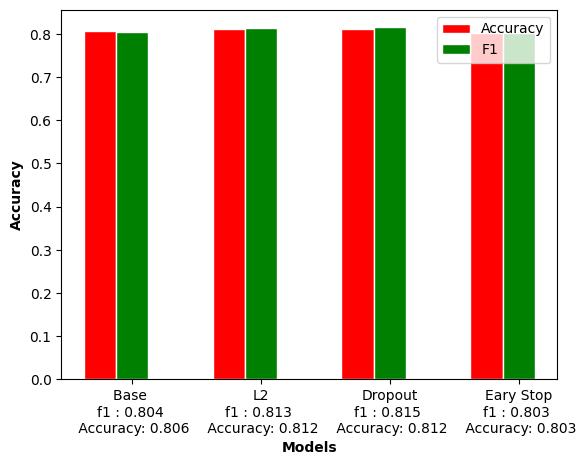

In [850]:
# The following accuracies were printed running the model and manually entered to plot the histograms
bars1 = [0.806,0.812,0.812, 0.803]
bars2 = [0.804,0.813,0.815, 0.803]

# set width of bar. To work and supply some padding
# the number of groups times barWidth must be
# a little less than 1 (since the next group
# will start at 1, then 2, etc).

barWidth = 0.25
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='F1')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Base \nf1 : 0.804 \n Accuracy: 0.806', 'L2\nf1 : 0.813 \n Accuracy: 0.812', 'Dropout\nf1 : 0.815 \n Accuracy: 0.812', 'Eary Stop\nf1 : 0.803 \n Accuracy: 0.803'])

plt.ylabel('Accuracy',fontweight='bold')
    
# Create legend & Show graphic
plt.legend()
plt.show()
#plt.savefig("barChart.pdf",dpi=400,bbox_inches='tight',pad_inches=0.05) # save as a pdf

In [843]:
model = keras.Sequential()
# model.add(layers.Flatten(input_shape=(128, 128, 3)))
model.add(keras.layers.Dense(128,input_shape=(49152,),activation = 'relu'))
model.add(keras.layers.Dense(32,activation = 'relu'))
model.add(keras.layers.Dense(8,activation = 'relu'))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
                
x_ten =  tf.constant(x_Train)
y_ten =  tf.constant(y_Train)
dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
                     
model.fit(dataset,validation_data=(x_val,y_val), epochs=50)

Epoch 1/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5488 - accuracy: 0.7103 - val_loss: 0.4784 - val_accuracy: 0.7800
Epoch 2/50
94/94 [==============================] - 1s 6ms/step - loss: 0.4096 - accuracy: 0.8153 - val_loss: 0.4528 - val_accuracy: 0.7970
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3496 - accuracy: 0.8533 - val_loss: 0.4415 - val_accuracy: 0.7990
Epoch 4/50
94/94 [==============================] - 1s 6ms/step - loss: 0.3067 - accuracy: 0.8780 - val_loss: 0.4379 - val_accuracy: 0.8040
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 0.2745 - accuracy: 0.8970 - val_loss: 0.4336 - val_accuracy: 0.8080
Epoch 6/50
94/94 [==============================] - 1s 8ms/step - loss: 0.2479 - accuracy: 0.9153 - val_loss: 0.4335 - val_accuracy: 0.8150
Epoch 7/50
94/94 [==============================] - 1s 7ms/step - loss: 0.2247 - accuracy: 0.9267 - val_loss: 0.4334 - val_accuracy: 0.8130
Epoch 8/50
94/94 [==

In [824]:
        model = keras.Sequential()
        model.add(keras.layers.Dense(128,input_shape=(49152,),activation = 'relu'))
        model.add(keras.layers.Dense(32,activation = 'relu'))
        model.add(keras.layers.Dense(8,activation = 'relu'))
        model.add(keras.layers.Dense(1,activation = 'sigmoid')) 
    
        model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
        x_ten =  tf.constant(x_Train)
        y_ten =  tf.constant(y_Train)
        dataset = tf.data.Dataset.from_tensor_slices((x_ten, y_ten)).batch(32)
        r = model.fit(dataset, validation_data=(x_val,y_val), epochs=30)

Epoch 1/30
94/94 [==============================] - 1s 12ms/step - loss: 1.8056 - accuracy: 0.7290 - val_loss: 1.7265 - val_accuracy: 0.7780
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 1.6103 - accuracy: 0.8233 - val_loss: 1.6688 - val_accuracy: 0.7910
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 1.4985 - accuracy: 0.8680 - val_loss: 1.6212 - val_accuracy: 0.7950
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 1.4095 - accuracy: 0.8960 - val_loss: 1.5800 - val_accuracy: 0.8010
Epoch 5/30
94/94 [==============================] - 1s 8ms/step - loss: 1.3349 - accuracy: 0.9220 - val_loss: 1.5426 - val_accuracy: 0.8030
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 1.2691 - accuracy: 0.9313 - val_loss: 1.5052 - val_accuracy: 0.8000
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 1.2094 - accuracy: 0.9413 - val_loss: 1.4711 - val_accuracy: 0.8020
Epoch 8/30
94/94 [=

In [844]:
y_pred = model.predict(x_eval)


32/32 [==============================] - 0s 2ms/step


In [845]:
y_pred = (y_pred >= 0.5).astype(int)

In [846]:
accuracy = accuracy_score(y_pred,y_eval)

In [847]:
accuracy

0.806

In [848]:
score = f1_score(y_pred,y_eval)

In [849]:
score

0.8048289738430584